# TASK 1

## a. Import required libraries




In [1]:
import pandas as pd
import missingno as msno #Finds null values
import numpy as np #Replace nulls
import seaborn as sns #For boxplot to find outliers
import matplotlib.pyplot as plt #to resize the figures
import regex as re # importing regex library to delete repetitive name in each row
from scipy import stats

## b. Read data file

In [2]:
df = pd.read_csv(r'C:\Users\Sonika\Documents\Spring 2022\CIS 518\project_1\project_1\project1_ds.csv')
df #Call the dataset

,Unnamed: 0,X.,Name,Type.1,Type.2,Total,HP,Attack,Defense,Sp..Atk,Sp..Def,Speed,Generation,Legendary,Win_rate,Type1_Win_rate
0,1,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,0.17,0.446002
1,2,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,0.36,0.446002
2,3,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,0.63,0.446002
3,4,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,0.58,0.446002
4,5,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,0.48,0.441195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True,NaN,0.519051
796,797,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True,NaN,0.519051
797,798,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True,NaN,0.400652
798,799,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True,NaN,0.400652


## c. Check the dataframe shape

In [3]:
df.shape ##Check for number of rows and columns

(800, 16)

## d.Make Dataframe more readable



In [4]:
df1 = df.drop('Unnamed: 0', axis = 1) ## Dropping Column Unnamed: 0 to level the rows
df1

,X.,Name,Type.1,Type.2,Total,HP,Attack,Defense,Sp..Atk,Sp..Def,Speed,Generation,Legendary,Win_rate,Type1_Win_rate
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,0.17,0.446002
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,0.36,0.446002
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,0.63,0.446002
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,0.58,0.446002
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,0.48,0.441195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True,NaN,0.519051
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True,NaN,0.519051
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True,NaN,0.400652
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True,NaN,0.400652


In [5]:
sorted_df1 = df1.sort_values(by= 'Name') #Sorted by Pokemon's name

In [6]:
sorted_df1.duplicated() #Check for any duplicate rows

510    False
511    False
68     False
392    False
393    False
       ...  
632    False
631    False
46     False
695    False
794    False
Length: 800, dtype: bool

In [7]:
#To rename Attributes  

df1.rename({'Type.1': 'Type 1',\

           'Type.2': 'Type 2',\

           'Sp..Atk': 'Special_Attack',\

           'Sp..Def': 'Special_Defense'}, axis=1, inplace = True) 

df1 

,X.,Name,Type 1,Type 2,Total,HP,Attack,Defense,Special_Attack,Special_Defense,Speed,Generation,Legendary,Win_rate,Type1_Win_rate
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,0.17,0.446002
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,0.36,0.446002
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,0.63,0.446002
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,0.58,0.446002
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,0.48,0.441195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True,NaN,0.519051
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True,NaN,0.519051
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True,NaN,0.400652
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True,NaN,0.400652


In [8]:
##delete repetitive name in each row
df1.Name = df1.Name.apply(lambda x: re.sub(r'(.+)(Mega.+)',r'\2', x)) 

df1.head() 

,X.,Name,Type 1,Type 2,Total,HP,Attack,Defense,Special_Attack,Special_Defense,Speed,Generation,Legendary,Win_rate,Type1_Win_rate
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,0.17,0.446002
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,0.36,0.446002
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,0.63,0.446002
3,3,Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,0.58,0.446002
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,0.48,0.441195


## e.Check data types for each column 

In [9]:
df1.dtypes ##Check the datatype for each column

X.                   int64
Name                object
Type 1              object
Type 2              object
Total                int64
HP                   int64
Attack               int64
Defense              int64
Special_Attack       int64
Special_Defense      int64
Speed                int64
Generation           int64
Legendary             bool
Win_rate           float64
Type1_Win_rate     float64
dtype: object

# TASK 2 

## a. Find any missing values using missingno

In [10]:
df1.isna().sum() #Shows total number of null values in each columns

X.                   0
Name                 0
Type 1               0
Type 2             386
Total                0
HP                   0
Attack               0
Defense              0
Special_Attack       0
Special_Defense      0
Speed                0
Generation           0
Legendary            0
Win_rate            94
Type1_Win_rate       0
dtype: int64

<AxesSubplot:>

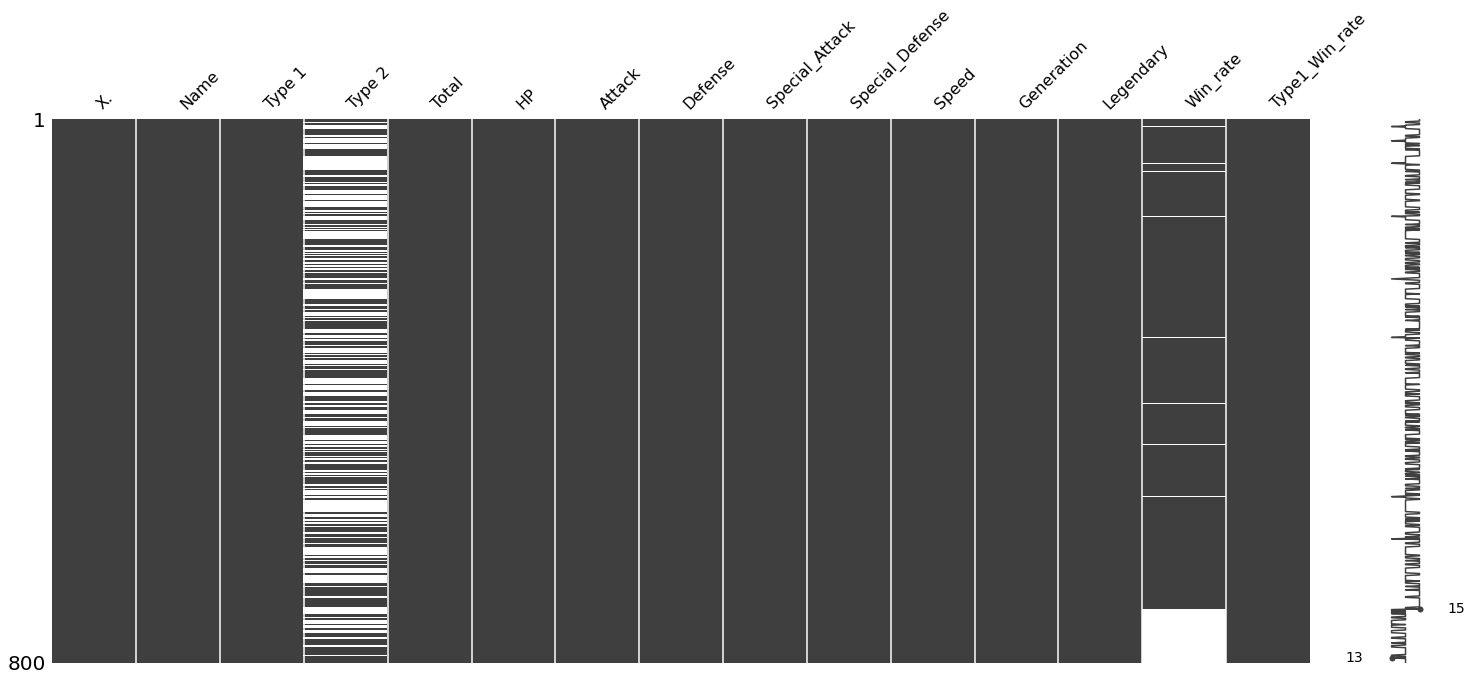

In [11]:
msno.matrix(df1) #Visualizes the null values

The missing numbers are represented by white lines on the visual from missingno. 
“Missing values are the white lines on the visual. We can see that Type.2 and Win_Rate missing values are represented differently. Type 2 and Win_Rate have large portions of missing data.” 

## b. Dealing with missing values for Type.2 and Win_rate 

In [12]:
## Replace nulls with NaN
##Type 2
df1['Type 2'].replace('', np.NaN)


0      Poison
1      Poison
2      Poison
3      Poison
4         NaN
        ...  
795     Fairy
796     Fairy
797     Ghost
798      Dark
799     Water
Name: Type 2, Length: 800, dtype: object

In [13]:
## Win_Rate
df1['Win_rate'].replace('NA',np.NaN)

0      0.17
1      0.36
2      0.63
3      0.58
4      0.48
       ... 
795     NaN
796     NaN
797     NaN
798     NaN
799     NaN
Name: Win_rate, Length: 800, dtype: float64

# TASK 3

## a.Using Boxplot to visualize outliers in quantitative variables 

<AxesSubplot:>

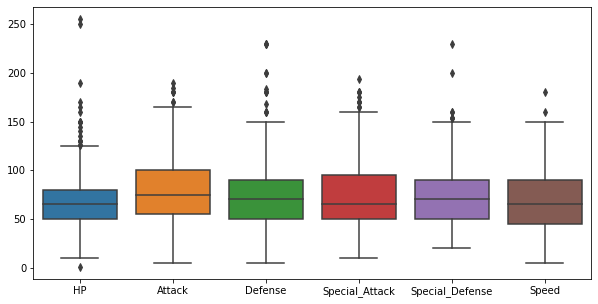

In [14]:
pokemon_stats = df1.drop(['Type 1', 'Type 2','X.', 'Legendary', 'Name', 'Total', 'Generation','Win_rate','Type1_Win_rate'], axis=1)
plt.figure(figsize=(10,5))
sns.boxplot(data=pokemon_stats)

## b. How to handle outliers 

In [15]:
##Drop unnecessary Columns
pokemon_outliers1 = df1.drop(['Type 1','X.' ,'Type 2', 'Legendary', 'Name', 'Total', 'Generation','Win_rate','Type1_Win_rate'], axis=1)

pokemon_outliers1

,HP,Attack,Defense,Special_Attack,Special_Defense,Speed
0,45,49,49,65,65,45
1,60,62,63,80,80,60
2,80,82,83,100,100,80
3,80,100,123,122,120,80
4,39,52,43,60,50,65
...,...,...,...,...,...,...
795,50,100,150,100,150,50
796,50,160,110,160,110,110
797,80,110,60,150,130,70
798,80,160,60,170,130,80


In [16]:
pokemon_outliers = pokemon_outliers1.iloc[:,] ##access all the rows and columns as a Boolean array.

pokemon_outliers


,HP,Attack,Defense,Special_Attack,Special_Defense,Speed
0,45,49,49,65,65,45
1,60,62,63,80,80,60
2,80,82,83,100,100,80
3,80,100,123,122,120,80
4,39,52,43,60,50,65
...,...,...,...,...,...,...
795,50,100,150,100,150,50
796,50,160,110,160,110,110
797,80,110,60,150,130,70
798,80,160,60,170,130,80


In [17]:
z_scores = stats.zscore(pokemon_outliers1) #Finding Zscore  

In [18]:
z_scores

,HP,Attack,Defense,Special_Attack,Special_Defense,Speed
0,-0.950626,-0.924906,-0.797154,-0.239130,-0.248189,-0.801503
1,-0.362822,-0.524130,-0.347917,0.219560,0.291156,-0.285015
2,0.420917,0.092448,0.293849,0.831146,1.010283,0.403635
3,0.420917,0.647369,1.577381,1.503891,1.729409,0.403635
4,-1.185748,-0.832419,-0.989683,-0.392027,-0.787533,-0.112853
...,...,...,...,...,...,...
795,-0.754692,0.647369,2.443765,0.831146,2.808099,-0.629341
796,-0.754692,2.497104,1.160233,2.665905,1.369846,1.436611
797,0.420917,0.955658,-0.444182,2.360112,2.088973,0.059310
798,0.420917,2.497104,-0.444182,2.971699,2.088973,0.403635


In [19]:
abs_z_scores = np.abs(z_scores) ## turns all negative values to positive values using abs
abs_z_scores

,HP,Attack,Defense,Special_Attack,Special_Defense,Speed
0,0.950626,0.924906,0.797154,0.239130,0.248189,0.801503
1,0.362822,0.524130,0.347917,0.219560,0.291156,0.285015
2,0.420917,0.092448,0.293849,0.831146,1.010283,0.403635
3,0.420917,0.647369,1.577381,1.503891,1.729409,0.403635
4,1.185748,0.832419,0.989683,0.392027,0.787533,0.112853
...,...,...,...,...,...,...
795,0.754692,0.647369,2.443765,0.831146,2.808099,0.629341
796,0.754692,2.497104,1.160233,2.665905,1.369846,1.436611
797,0.420917,0.955658,0.444182,2.360112,2.088973,0.059310
798,0.420917,2.497104,0.444182,2.971699,2.088973,0.403635


In [20]:
filtered_entries = (abs_z_scores < 3  ).all ##Filter values that are less than 
filtered_entries

<bound method NDFrame._add_numeric_operations.<locals>.all of        HP  Attack  Defense  Special_Attack  Special_Defense  Speed
0    True    True     True            True             True   True
1    True    True     True            True             True   True
2    True    True     True            True             True   True
3    True    True     True            True             True   True
4    True    True     True            True             True   True
..    ...     ...      ...             ...              ...    ...
795  True    True     True            True             True   True
796  True    True     True            True             True   True
797  True    True     True            True             True   True
798  True    True     True            True             True   True
799  True    True     True            True             True   True

[800 rows x 6 columns]>

In [21]:
z=np.abs(stats.zscore(pokemon_outliers1))
z

,HP,Attack,Defense,Special_Attack,Special_Defense,Speed
0,0.950626,0.924906,0.797154,0.239130,0.248189,0.801503
1,0.362822,0.524130,0.347917,0.219560,0.291156,0.285015
2,0.420917,0.092448,0.293849,0.831146,1.010283,0.403635
3,0.420917,0.647369,1.577381,1.503891,1.729409,0.403635
4,1.185748,0.832419,0.989683,0.392027,0.787533,0.112853
...,...,...,...,...,...,...
795,0.754692,0.647369,2.443765,0.831146,2.808099,0.629341
796,0.754692,2.497104,1.160233,2.665905,1.369846,1.436611
797,0.420917,0.955658,0.444182,2.360112,2.088973,0.059310
798,0.420917,2.497104,0.444182,2.971699,2.088973,0.403635


In [22]:
np.where(z > 3) ## List of outliers

(array([ 71,  87,  98, 121, 155, 163, 164, 217, 223, 224, 230, 230, 232,
        261, 313, 315, 332, 333, 351, 414, 415, 422, 422, 424, 426, 426,
        429, 429, 430, 431, 456, 473, 544, 545, 655, 789], dtype=int64),
 array([3, 2, 2, 0, 0, 1, 3, 0, 2, 2, 2, 4, 1, 0, 0, 5, 2, 2, 0, 2, 4, 3,
        4, 1, 1, 3, 1, 3, 4, 5, 2, 0, 0, 0, 0, 2], dtype=int64))

In [23]:
z_pokemons = pokemon_outliers[(z < 3).all(axis=1)] ## list of scores that has zscore less than 3
#Comparing shape before and after
pokemon_outliers.shape,z_pokemons[['HP','Attack','Defense','Special_Attack','Special_Defense','Speed']].shape 

((800, 6), (768, 6))

<AxesSubplot:>

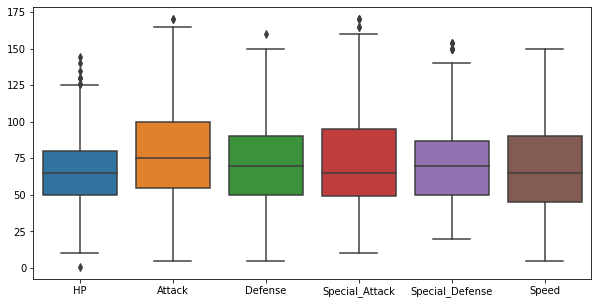

In [24]:
##After dealing with outliers
plt.figure(figsize=(10,5))
sns.boxplot(data=z_pokemons)

## b.Checking descriptive statistics


In [25]:
pokemon_stats.describe()

,HP,Attack,Defense,Special_Attack,Special_Defense,Speed
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500
std,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474
min,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000
50%,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000
75%,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000
max,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000


In [26]:
z_pokemons.describe()

,HP,Attack,Defense,Special_Attack,Special_Defense,Speed
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.00000
mean,67.687500,78.045573,72.070312,72.069010,70.906250,67.93750
std,22.017624,31.019895,27.437405,31.510668,26.353807,28.19223
min,1.000000,5.000000,5.000000,10.000000,20.000000,5.00000
25%,50.000000,55.000000,50.000000,49.000000,50.000000,45.00000
50%,65.000000,75.000000,70.000000,65.000000,70.000000,65.00000
75%,80.000000,100.000000,90.000000,95.000000,87.000000,90.00000
max,144.000000,170.000000,160.000000,170.000000,154.000000,150.00000


# TASK 4

## Analyzing association between two variables

## a. Finding most common and uncommon Pokemons


TYPE 1

C:\Users\Sonika\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Type 1', ylabel='count'>

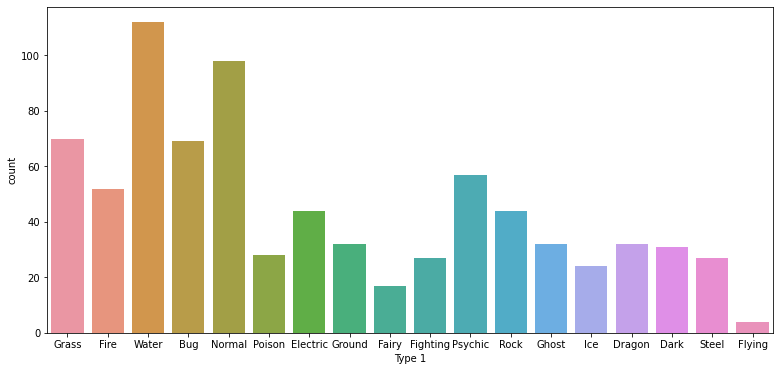

In [27]:
plt.figure(figsize=(13,6))
sns.countplot(df1['Type 1']) 

TYPE 2

C:\Users\Sonika\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Type 2', ylabel='count'>

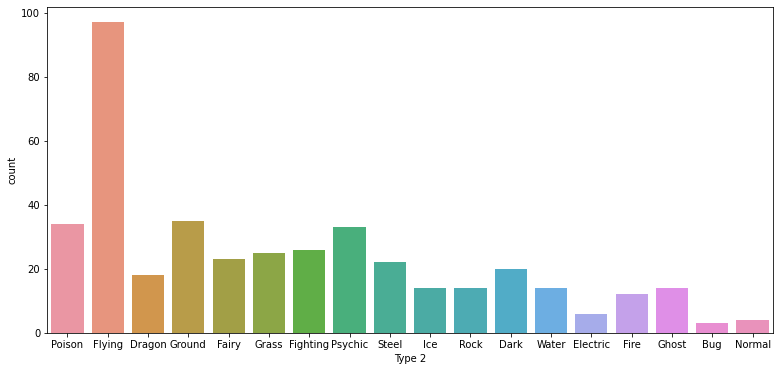

In [28]:
plt.figure(figsize=(13,6))
sns.countplot(df1['Type 2'])

## b. Generation with maximum Pokemons

In [29]:
df2=pd.DataFrame(data=df1, columns=['Generation']) ##list only from Generation columns
df2.groupby(['Generation'])['Generation'].count() ## Group by Generation --counts number of each generation

Generation
1    166
2    106
3    160
4    121
5    165
6     82
Name: Generation, dtype: int64

C:\Users\Sonika\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Generation', ylabel='count'>

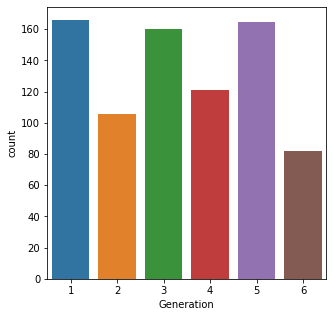

In [30]:

plt.figure(figsize=(5,5))
sns.countplot(df2['Generation'])

## c. Generation that has maximum Legendary Pokemons

In [31]:
Legendary_True = df1[df1['Legendary'] == True] ##list only from Legendary columns that's true
max_Gen = Legendary_True.groupby(['Generation'])['Legendary'].count() ## Group by Generation --counts number of each generation with true Legendary

In [32]:
max_Gen.sort_values( ascending=False) ## max count first


Generation
3    18
5    15
4    13
6     8
1     6
2     5
Name: Legendary, dtype: int64

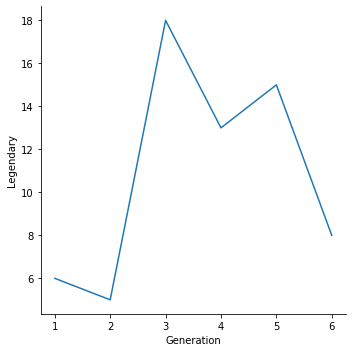

In [33]:
sns.relplot(data=max_Gen, kind = "line")

## d. Types of Pokemons that are most speedy

In [34]:
most_speed = df1['Speed'].max() #Finds out the highest speed
df1[['Type 1','Type 2','Speed']][df1.Speed== most_speed] # finds out the type of the highest speed pokemon


,Type 1,Type 2,Speed
431,Psychic,NaN,180


In [35]:
##Lsit to show the most speedy 
Speed = df1.sort_values(by='Speed', ascending=False) #sorting the rows in descending order 

Speed.drop_duplicates(subset=['Type 1'],keep='first') 

,X.,Name,Type 1,Type 2,Total,HP,Attack,Defense,Special_Attack,Special_Defense,Speed,Generation,Legendary,Win_rate,Type1_Win_rate
431,386,DeoxysSpeed Forme,Psychic,NaN,600,50,95,90,95,90,180,3,True,0.89,0.400652
315,291,Ninjask,Bug,Flying,456,61,90,45,50,50,160,3,False,0.92,0.493884
154,142,Mega Aerodactyl,Rock,Flying,615,80,135,85,70,95,150,1,False,0.98,0.519051
275,254,Mega Sceptile,Grass,Dragon,630,70,110,75,145,85,145,3,False,0.96,0.446002
109,101,Electrode,Electric,NaN,480,60,50,70,80,80,140,1,False,0.83,0.444901
476,428,Mega Lopunny,Normal,Fighting,580,65,136,94,54,96,135,4,False,0.94,0.481159
183,169,Crobat,Poison,Flying,535,85,90,80,70,80,130,2,False,0.89,0.521609
102,94,Mega Gengar,Ghost,Poison,600,60,65,80,170,95,130,1,False,0.88,0.555501
731,663,Talonflame,Fire,Flying,499,78,81,71,74,69,126,6,False,NaN,0.441195
549,491,Darkrai,Dark,NaN,600,70,90,90,135,90,125,4,True,0.93,0.489887


In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

grouped_main = df1.groupby('Type 1')

grouped_main['Speed'].mean().sort_values(ascending=False)

Type 1
Flying      102.500000
Electric     84.500000
Dragon       83.031250
Psychic      81.491228
Dark         76.161290
Fire         74.442308
Normal       71.551020
Fighting     66.074074
Water        65.964286
Ghost        64.343750
Ground       63.906250
Poison       63.571429
Ice          63.458333
Grass        61.928571
Bug          61.681159
Rock         55.909091
Steel        55.259259
Fairy        48.588235
Name: Speed, dtype: float64

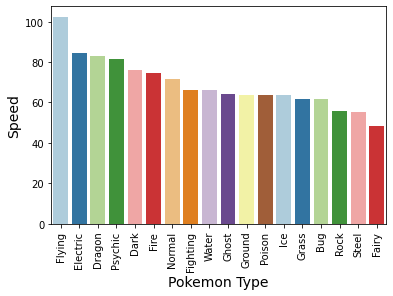

In [37]:

fig, ax = plt.subplots(1, 1)
group_obj = grouped_main['Speed'].mean().sort_values(ascending=False).reset_index()
sns.barplot(data=df1,
x='Type 1',
y='Speed', palette='Paired',
ax=ax, ci=None,
order=group_obj['Type 1'])
xlabels = ax.get_xticklabels()
ax.set_xticklabels(rotation=90, labels=xlabels)
ax.set_xlabel('Pokemon Type', fontsize=14),
ax.set_ylabel('Speed', fontsize=14);


In [38]:
Highest_Win_Rate = df1['Win_rate'].max() ##Finds out the max Speed

In [39]:
max_win_rate_Pokemons = df1[df1['Win_rate'] == Highest_Win_Rate ] ## List pokemons df with max win rate
max_win_rate_Pokemons[['Name','Type 1','Type 2']] ## Lists name and type of Pokemons with highest win rate

,Name,Type 1,Type 2
154,Mega Aerodactyl,Rock,Flying


In [40]:
Win_rate = df1.sort_values(by='Win_rate', ascending=False) #sorting the rows in descending order 

Win_rate.drop_duplicates(subset=['Type 1'],keep='first') 

,X.,Name,Type 1,Type 2,Total,HP,Attack,Defense,Special_Attack,Special_Defense,Speed,Generation,Legendary,Win_rate,Type1_Win_rate
154,142,Mega Aerodactyl,Rock,Flying,615,80,135,85,70,95,150,1,False,0.98,0.519051
512,461,Weavile,Dark,Ice,510,70,120,65,45,85,125,4,False,0.97,0.489887
19,15,Mega Beedrill,Bug,Poison,495,65,150,40,15,80,145,1,False,0.96,0.493884
275,254,Mega Sceptile,Grass,Dragon,630,70,110,75,145,85,145,3,False,0.96,0.446002
163,150,Mega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True,0.95,0.400652
426,384,Mega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True,0.95,0.522461
703,641,TornadusTherian Forme,Flying,NaN,580,79,100,80,110,90,121,5,True,0.95,0.497487
146,135,Jolteon,Electric,NaN,525,65,65,60,110,95,130,1,False,0.95,0.444901
476,428,Mega Lopunny,Normal,Fighting,580,65,136,94,54,96,135,4,False,0.94,0.481159
714,647,KeldeoResolute Forme,Water,Fighting,580,91,72,90,129,90,108,5,False,0.94,0.495605


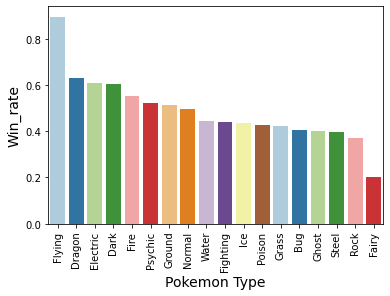

In [41]:
grouped_main = df1.groupby('Type 1')


grouped_main['Win_rate'].mean().sort_values(ascending=False)


fig, ax = plt.subplots(1, 1)
group_obj = grouped_main['Win_rate'].mean().sort_values(ascending=False).reset_index()
sns.barplot(data=df1,
x='Type 1',
y='Win_rate', palette='Paired',
ax=ax, ci=None,
order=group_obj['Type 1'])
xlabels = ax.get_xticklabels()
ax.set_xticklabels(rotation=90, labels=xlabels)
ax.set_xlabel('Pokemon Type', fontsize=14),
ax.set_ylabel('Win_rate', fontsize=14);

## Checking correlations between Win_rate and other variables

From the correlation chart below, we can say that Win_Rate and Speed are correlated. Therefore, when the speed is high the Win_rate is high as well and vice versa

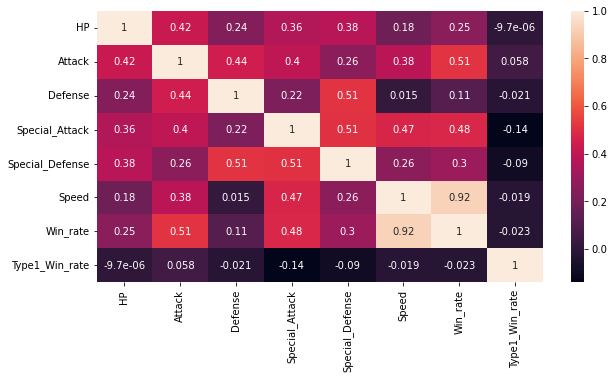

In [43]:
pokemon_correlation = df1.drop(['Type 1', 'Type 2', 'Legendary','X.','Name', 'Total', 'Generation'], axis=1) #Drop unnecessary column
plt.figure(figsize=(10,5)) #manage the size of the plot
sns.heatmap(pokemon_correlation.corr(),annot=True) #pokemon.col() makes a correlation matrix and sns.heatmap is used to show the correlations heatmap
plt.show()

## Correlation between Attack and Defense

From the correlation chart below, we can say that Attack and Defense are not correlated. Therefore, when the Attack is at high the Defense is at its low and vice versa.

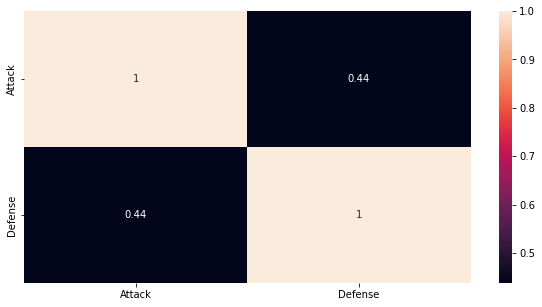

In [44]:
pokemon_col = df1.drop(['Type 1', 'Type 2','X.','Legendary', 'Total', 'Generation','HP','Special_Attack','Special_Defense','Speed','Win_rate','Type1_Win_rate'], axis=1)
plt.figure(figsize=(10,5)) #manage the size of the plot
sns.heatmap(pokemon_col.corr(),annot=True) #pokemon.col() makes a correlation matrix and sns.heatmap is used to show the correlations heatmap
plt.show()


In [45]:
pokemon_col = df1.drop(['Total', 'Legendary','HP', 'Special_Attack', 'Special_Defense', 'Speed','Type1_Win_rate', 'Generation'], axis=1) 

Attack = pokemon_col.sort_values(by='Attack', ascending=False) #sorting the rows in descending order 

Attack.drop_duplicates(subset=['Type 1'],keep='first') 

,X.,Name,Type 1,Type 2,Attack,Defense,Win_rate
163,150,Mega Mewtwo X,Psychic,Fighting,190,100,0.95
232,214,Mega Heracross,Bug,Fighting,185,115,0.57
424,383,GroudonPrimal Groudon,Ground,Fire,180,160,0.77
426,384,Mega Rayquaza,Dragon,Flying,180,100,0.95
387,354,Mega Banette,Ghost,NaN,165,75,0.63
454,409,Rampardos,Rock,NaN,165,60,0.33
313,289,Slaking,Normal,NaN,160,100,0.83
279,257,Mega Blaziken,Fire,Fighting,160,80,0.84
141,130,Mega Gyarados,Water,Dark,155,109,0.69
393,359,Mega Absol,Dark,NaN,150,60,0.93


In [46]:
pokemon_col = df1.drop(['Total', 'Legendary','HP', 'Special_Attack', 'Special_Defense', 'Speed','Type1_Win_rate', 'Generation'], axis=1) 

Defense = pokemon_col.sort_values(by='Defense', ascending=False) #sorting the rows in descending order 

Defense.drop_duplicates(subset=['Type 1'],keep='first') 

,X.,Name,Type 1,Type 2,Attack,Defense,Win_rate
230,213,Shuckle,Bug,Rock,10,230,0.00
224,208,Mega Steelix,Steel,Ground,125,230,0.25
414,377,Regirock,Rock,NaN,100,200,0.30
789,713,Avalugg,Ice,NaN,117,184,NaN
98,91,Cloyster,Water,Ice,95,180,0.53
424,383,GroudonPrimal Groudon,Ground,Fire,180,160,0.77
430,386,DeoxysDefense Forme,Psychic,NaN,70,160,0.73
624,563,Cofagrigus,Ghost,NaN,50,145,0.11
355,324,Torkoal,Fire,NaN,85,140,0.32
659,598,Ferrothorn,Grass,Steel,94,131,0.42


# Task 5: Analyzing 2 pokemons in a single chart

In [47]:
min_Win_rate_pokemons=df1[['Name','Type 1','Win_rate']][df1.Win_rate==df1['Win_rate'].min()]
min_Win_rate_pokemons

,Name,Type 1,Win_rate
189,Togepi,Fairy,0.0
230,Shuckle,Bug,0.0
289,Silcoon,Bug,0.0
488,Happiny,Normal,0.0
576,Munna,Psychic,0.0


In [48]:
max_Win_rate_pokemons=df1[['Name','Type 1','Win_rate']][df1.Win_rate==df1['Win_rate'].max()]
max_Win_rate_pokemons

,Name,Type 1,Win_rate
154,Mega Aerodactyl,Rock,0.98


In [49]:
pokemon_to_compare = df1.iloc[[189,154],:]
pokemon_to_compare

,X.,Name,Type 1,Type 2,Total,HP,Attack,Defense,Special_Attack,Special_Defense,Speed,Generation,Legendary,Win_rate,Type1_Win_rate
189,175,Togepi,Fairy,NaN,245,35,20,65,40,65,20,2,False,0.00,0.363225
154,142,Mega Aerodactyl,Rock,Flying,615,80,135,85,70,95,150,1,False,0.98,0.519051


In [50]:
pokemon_to_compare_new = pokemon_to_compare.drop([ 'Type 1', 'Type 2', 
                                                 'Generation', 'Legendary', 'Type1_Win_rate'], axis = 1)
pokemon_to_compare_new

,X.,Name,Total,HP,Attack,Defense,Special_Attack,Special_Defense,Speed,Win_rate
189,175,Togepi,245,35,20,65,40,65,20,0.00
154,142,Mega Aerodactyl,615,80,135,85,70,95,150,0.98


## SINGLE CHART VISUALISATION

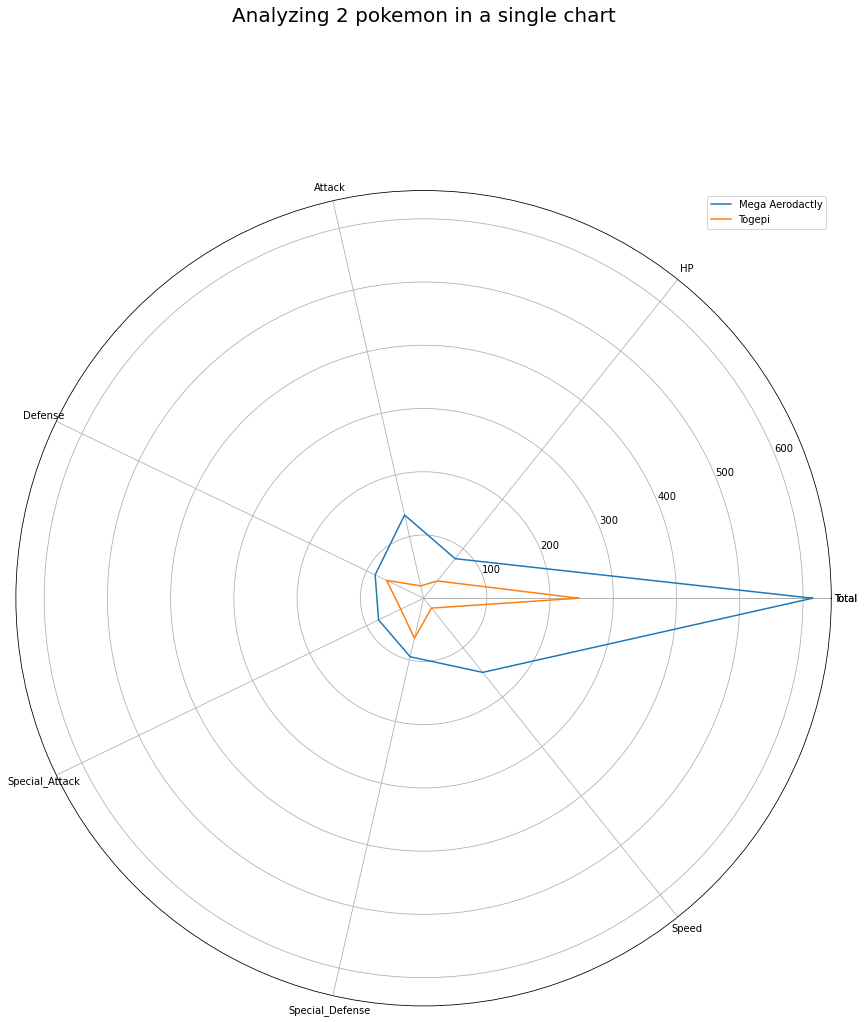

In [51]:
categories = ['Total', 'HP', 'Attack', 'Defense', 'Special_Attack', 'Special_Defense', 'Speed']
categories = [*categories, categories[0]]

Mega_Aerodactyl = [615, 80, 135, 85, 79, 95, 150]
Mega_Aerodactyl = [*Mega_Aerodactyl, Mega_Aerodactyl[0]]

Togepi = [245, 35, 20, 65, 40, 65, 20]
Togepi = [*Togepi, Togepi[0]]


label_loc = np.linspace(start =0, stop = 2*np.pi, num = len(Mega_Aerodactyl))

plt.figure(figsize = (1,10))
plt.subplot(polar = True)
plt.plot(label_loc, Mega_Aerodactyl, label = 'Mega Aerodactly')
plt.plot(label_loc, Togepi, label = 'Togepi')
plt.title('Analyzing 2 pokemon in a single chart', size = 20, y = 1.2)
lines, labels = plt.thetagrids(np.degrees(label_loc), labels = categories)
plt.legend()
plt.show()